# `scipy.optimize`


See the following page for a detailed list of routines: [scipy.optimize reference docs](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)

The module contains:

  - Unconstrained and constrained minimization of multivariate scalar functions (minimize) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP)
  - Global (brute-force) optimization routines (e.g. basinhopping, differential_evolution)
  - Least-squares minimization (least_squares) and curve fitting (curve_fit) algorithms
  - Scalar univariate functions minimizers (minimize_scalar) and root finders (newton)
  - Multivariate equation system solvers (root) using a variety of algorithms (e.g. hybrid Powell, Levenberg-Marquardt or large-scale methods such as Newton-Krylov).
  
Here are a couple of useful examples for simple problems.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## Curve fitting

In [2]:
from scipy.optimize import curve_fit

In [3]:
def func(x, a, b, c):
    """
    Fitting function for the data
    """
    return a * np.exp(-b * x) + c

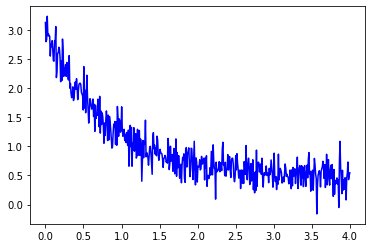

In [4]:
xdata = np.linspace(0, 4, 500)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
pass

func(x, a=2.539056388947125, b=1.2422321051457255, c=0.46912940107708445)


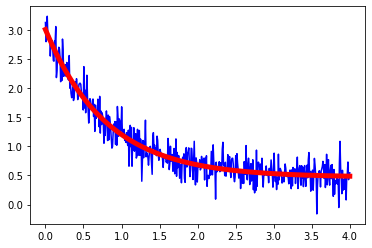

In [5]:
# Fit for the parameters a, b, c of the function func
popt, pcov = curve_fit(func, xdata, ydata)
print ("func(x, a={}, b={}, c={})".format(popt[0], popt[1], popt[2]))

# Now func (x, *popt) will give the y values of the fitted function

plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit', linewidth=5)

func(x, a=2.2735609286881, b=2.3877050450318427, c=1.0000000000000002)


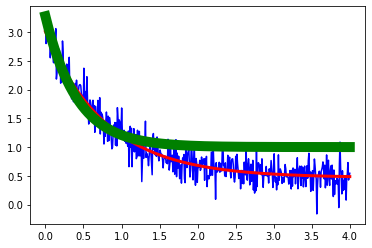

In [6]:
# Constraints on a, b, c
poptc, pcovc = curve_fit(func, xdata, ydata, bounds=([0.,0.,1.], [3.0, 3.0, 1.5]))
print ("func(x, a={}, b={}, c={})".format(poptc[0], poptc[1], poptc[2]))

plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit', linewidth=3)
plt.plot(xdata, func(xdata, *poptc), 'g-', label='fit-with-bounds', linewidth=10)

## Least squares

We can also use the general least squares machinery for a more adjustable curve fitting method

In [7]:
from scipy.optimize import least_squares

In [8]:
def gen_data(t, a, b, c, noise=0, n_outliers=0, random_state=0):
     y = a + b * np.exp(t * c)

     rnd = np.random.RandomState(random_state)
     error = noise * rnd.randn(t.size)
     outliers = rnd.randint(0, t.size, n_outliers)
     error[outliers] *= 10

     return y + error

a = 0.5
b = 2.0
c = -1
t_min = 0
t_max = 10
n_points = 15

t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(t_train, a, b, c, noise=0.1, n_outliers=3)

In [9]:
# Fitting function of three parameters in 2 variables
def fun(x, t, y):
    return x[0] + x[1] * np.exp(x[2] * t) - y

x0 = np.array([1.0, 1.0, 0.0])

In [10]:
# Solve the least squares problem

res_lsq = least_squares(fun, x0, args=(t_train, y_train))

In [11]:
# And the lsq with two different robust loss functions. 
# The parameter f_scale is set to 0.1, meaning that inlier 
# residuals should not significantly exceed 0.1 (the noise level used).

res_soft_l1 = least_squares(fun, x0, loss='soft_l1', f_scale=0.1,
                            args=(t_train, y_train))

res_log = least_squares(fun, x0, loss='cauchy', f_scale=0.1,
                        args=(t_train, y_train))

In [12]:
# Compute dense arrays of these fits to plot

t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = gen_data(t_test, a, b, c)
y_lsq = gen_data(t_test, *res_lsq.x)
y_soft_l1 = gen_data(t_test, *res_soft_l1.x)
y_log = gen_data(t_test, *res_log.x)

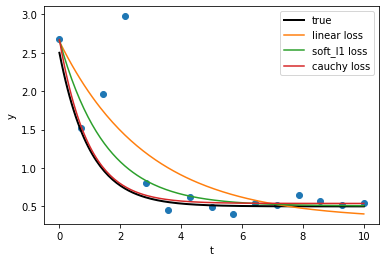

In [13]:
plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='linear loss')
plt.plot(t_test, y_soft_l1, label='soft_l1 loss')
plt.plot(t_test, y_log, label='cauchy loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()